In [1]:
import numpy as np
from numpy import exp, log, sqrt
from numpy.linalg import norm
from numpy.random import random
import matplotlib.pyplot as plt

In [2]:
N = 4

img1 = np.array([[2,   1,  2,  3],
                 [4,   5,  6,  7],
                 [8,   9, 10, 11],
                 [12, 13, 14, 15]])

img2 = np.array([[3,   1,  2,  3],
                 [4,   5,  6,  7],
                 [8,   9, 9, 11],
                 [12, 14, 14, 15]])

In [3]:
C = np.zeros((N ** 2, N ** 2))

for i in range(N ** 2):
    for j in range(N ** 2):
        C[i, j] = norm(np.array([i // N, i % N]) - np.array([j // N, j % N]), 2)

p = img1.reshape((N ** 2, ))
p = p / sum(p)
q = img2.reshape((N ** 2, ))
q = q / sum(q)

In [62]:
def sinkhorn(n, C, p, q, gamma, eps1, eps):
    l = np.ones(n)
    m = np.ones(n)

    X_new = 1/n**2 * np.ones((n, n))
    X_new_new = 1/n**2 * np.ones((n, n))
    tt = 0
    t = 0
    while True:
        tt += 1
        X = np.array(X_new)
        
#         print(norm(X_new - X, 2))
        while True:
#             print("+1")
            
            for i in range(n):
                l[i] = gamma * log(1/p[i] * np.sum([exp(-(gamma + C[i, j] + m[j])/gamma) * X[i, j] for j in range(n)]))
            for j in range(n):
                m[j] = gamma * log(1/q[j] * np.sum([exp(-(gamma + C[i, j] + l[i])/gamma) * X[i, j] for i in range(n)]))
            for i in range(n):
                for j in range(n):
                    X_new_new[i,j] = X[i, j] * exp(- (gamma + C[i,j] + l[i] + m[j])/gamma)
            
            if (sum(abs(norm(X_new_new, 1, axis=1) - p)) + sum(abs(norm(X_new_new, 1, axis=0) - q)) < eps) or norm(X_new_new - X_new, 2) < eps1:
                X_new = X_new_new
                break
            X_new = X_new_new
            
            t += 1

#         print(norm(X_new - X, 2))
        if norm(X_new - X, 2) <= eps1:
            break
    return X_new, t, tt-1

In [68]:
def test_gamma(method, gamma):
    gamma_exp = []
    T_exp = []
    TT_exp = []
    opt_point = 0

    for _ in range(12):
        gamma /= 1.2
        X, T, __ = method(gamma)
        gamma_exp.append(gamma)
        T_exp.append(T)
        TT_exp.append(__)
        try:
            if (opt_point == 0) and (T_exp[-1] - T_exp[-2]) / (gamma_exp[-2] - gamma_exp[-1]) >= 1:
                opt_point = gamma
        except:
            pass
    
    return gamma_exp, T_exp, TT_exp, opt_point

In [75]:
eps1 = 0.0001
eps = 0.01
gamma_exp, T_exp, TT_exp, opt_point = test_gamma(lambda gamma: sinkhorn(N ** 2, C, p, q, gamma, eps1, eps), gamma=1)

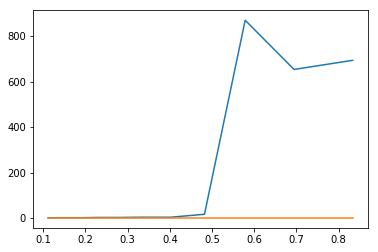

In [76]:
plt.plot(gamma_exp, TT_exp)
plt.plot(gamma_exp, T_exp)